In [1]:
#1 Load the dataset and inspect its structure (shape, columns, datatypes, first 5 rows).
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\MUFG\train.csv")
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df.shape

(614, 13)

In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#2 Perform data cleaning: handle missing values, encode categorical variables, drop irrelevant features.
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [9]:
df.duplicated().sum()

0

In [10]:
df=df.dropna()

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df = df.drop("Loan_ID", axis=1)

In [13]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [14]:
df = df.fillna(df.mean(numeric_only=True))
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [16]:
#3 Perform Exploratory Data Analysis (EDA): summary statistics, countplots/histograms, correlation heatmap.
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.202083,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


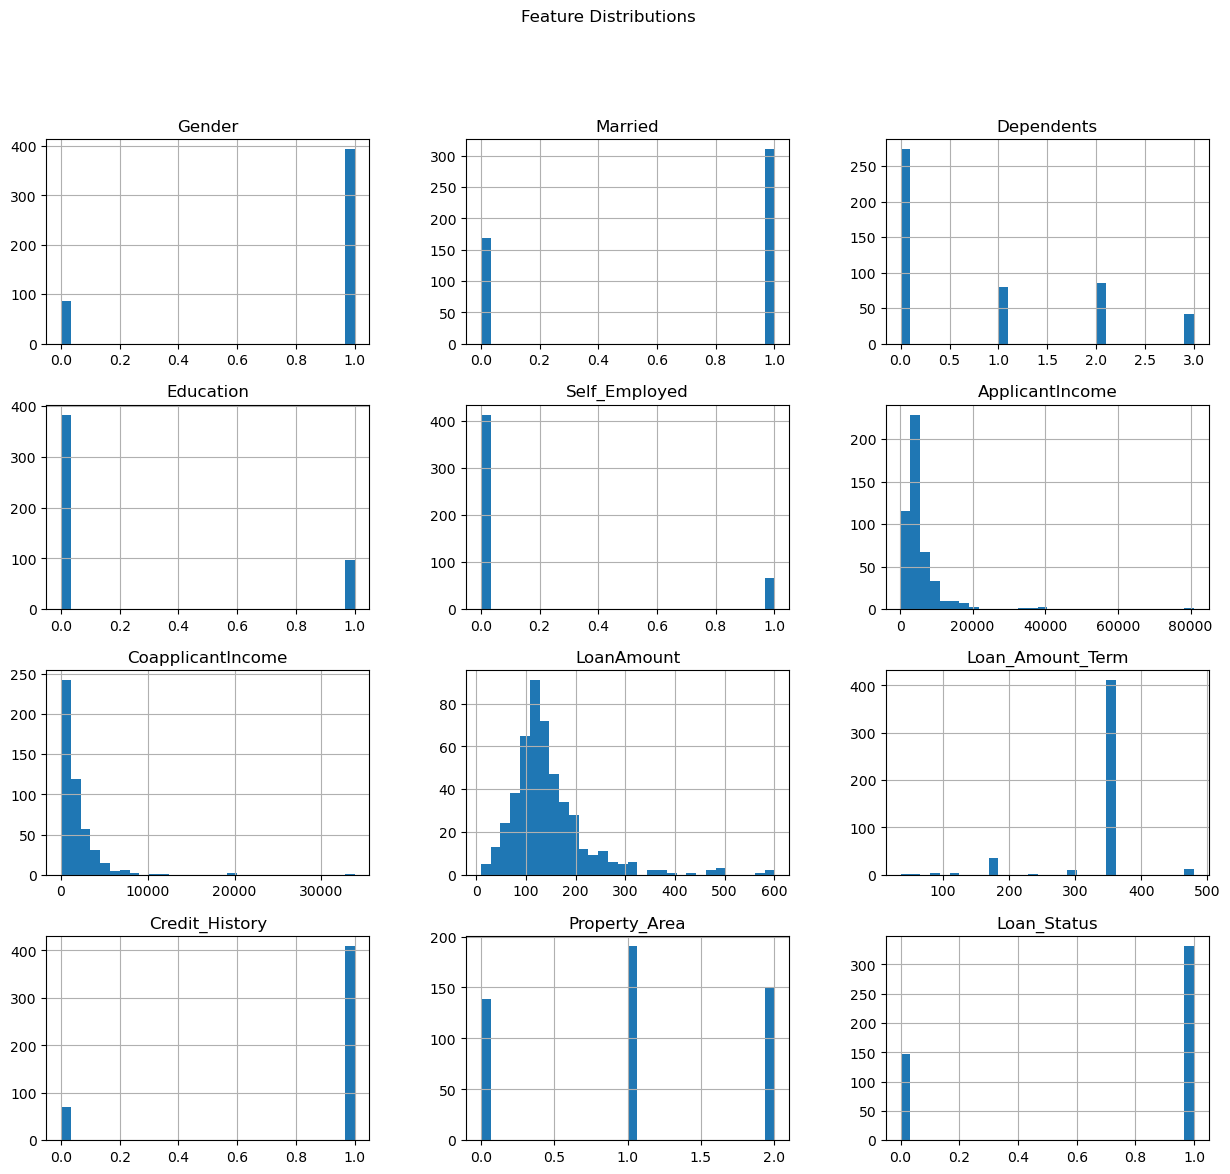

In [17]:
df.hist(bins=30, figsize=(15,13))
plt.suptitle("Feature Distributions")
plt.show()

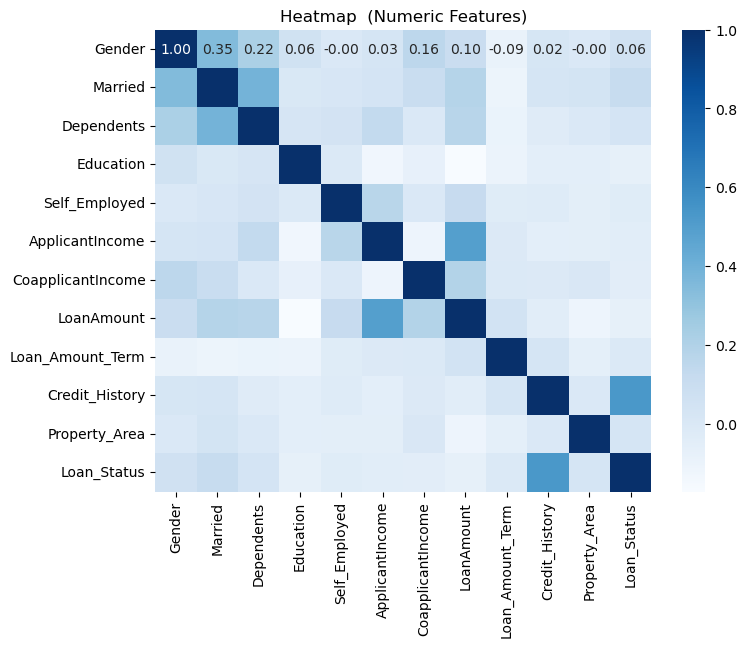

In [37]:
import seaborn as sns
num_df = df.select_dtypes(include=['number'])
corr = num_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Heatmap  (Numeric Features)")
plt.show()

In [19]:
#4 Define the target variable (Loan_Status) and independent variables.
X=df.drop("Loan_Status",axis=1)

In [20]:
y=df['Loan_Status']

In [21]:
#5. Split the dataset into training (70%) and testing (30%) sets.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [22]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
560,1,1,2,1,0,3675,242.0,108.0,360.0,1.0,1
75,1,0,0,0,0,3750,0.0,113.0,480.0,1.0,2
145,0,1,0,0,0,2330,4486.0,100.0,360.0,1.0,1
397,1,1,0,0,0,3033,1459.0,95.0,360.0,1.0,2
319,1,1,1,0,1,10000,0.0,155.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
141,1,0,0,0,0,5417,0.0,168.0,360.0,1.0,2
350,1,1,0,0,0,9083,0.0,228.0,360.0,1.0,1
445,1,1,1,0,1,3466,1210.0,130.0,360.0,1.0,0
558,1,1,0,0,0,3887,2669.0,162.0,360.0,1.0,1


In [23]:
y_train

560    1
75     0
145    1
397    1
319    0
      ..
141    1
350    1
445    1
558    1
137    1
Name: Loan_Status, Length: 336, dtype: int32

In [24]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
92,1,1,2,1,0,3273,1820.0,81.0,360.0,1.0,2
529,1,0,0,1,0,6783,0.0,130.0,360.0,1.0,1
505,1,1,2,0,0,3510,4416.0,243.0,360.0,1.0,0
358,1,1,0,1,0,3000,1666.0,100.0,480.0,0.0,2
512,1,1,2,0,0,3283,2035.0,148.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
58,1,1,1,0,0,8080,2250.0,180.0,360.0,1.0,2
20,1,1,0,1,0,7660,0.0,104.0,360.0,0.0,2
577,1,0,0,0,0,3229,2739.0,110.0,360.0,1.0,2
476,1,1,2,0,0,6700,1750.0,230.0,300.0,1.0,1


In [25]:
y_test

92     1
529    1
505    1
358    0
512    1
      ..
58     1
20     0
577    1
476    1
4      1
Name: Loan_Status, Length: 144, dtype: int32

In [28]:
#6. Train a Logistic Regression model on the training set.
#7. Make predictions on the test set.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [29]:
#8. Evaluate the model using Accuracy, Precision, Recall, F1 Score, and Confusion Matrix.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

Accuracy: 0.7986111111111112
Precision: 0.7751937984496124
Recall: 1.0
F1 Score: 0.8733624454148472

Confusion Matrix:
 [[ 15  29]
 [  0 100]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.34      0.51        44
           1       0.78      1.00      0.87       100

    accuracy                           0.80       144
   macro avg       0.89      0.67      0.69       144
weighted avg       0.84      0.80      0.76       144



In [33]:
#9. Interpret coefficients: which features influence loan approval most strongly?
coefficients = pd.DataFrame({"Feature": X.columns,"Coefficient": model.coef_[0]})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)

print(coefficients)
#The feature that most strongly influences loan approval is Credit_History. 
#Other features LoanAmount, ApplicantIncome, Education, and Property_Area also play an important role less strongly.

              Feature  Coefficient
9      Credit_History     2.560846
1             Married     0.580108
0              Gender     0.418640
10      Property_Area     0.083623
5     ApplicantIncome     0.000013
6   CoapplicantIncome    -0.000032
7          LoanAmount    -0.003138
8    Loan_Amount_Term    -0.004236
4       Self_Employed    -0.120911
3           Education    -0.178977
2          Dependents    -0.273208
